# This is an Jupyter notebook backed by a Ruby kernel

I am developing [IRuby](https://github.com/SciRuby/iruby) a kernel in Ruby that adheres to the [Jupyter](http://jupyter.org/)/[IPython](http://ipython.org/) messaging protocol. It integrates nicely with different Rubygems as will be shown later.

## What does this give you?

This gives us a very fancy web notebook interface for Ruby.  It's a very good tool for programming presentations. It's basically an in-browser REPL loop, with some extra goodies.

## Usage

Install IRuby with:

~~~
gem install iruby
~~~

Start the IRuby notebook with:

~~~
iruby notebook
~~~

## Example

`$stdout` and `$stderr` are redirected to the notebook

In [1]:
puts 'Hello, world!'

Hello, world!


In [6]:
$stderr.puts 'Error!'

Error!


The last computed result is returned.

In [3]:
Math.sqrt(2)

1.4142135623730951

This works even for images.

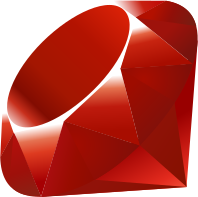

In [7]:
File.open('images/ruby.svg')

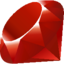

In [8]:
File.open('images/ruby.png')

## Display

IRuby provides a method to display objects `IRuby.display` and methods to create $\LaTeX$ and HTML representations.

In [9]:
IRuby.display '<b style="color:green">Hello, world!</b>', mime: 'text/html'

"<b style=\"color:green\">Hello, world!</b>"

#<CZTop::Socket::PUB:0x7fafaa54a360 last_endpoint="tcp://127.0.0.1:52903">

In [13]:
IRuby.html '<iframe src=http://en.m.wikipedia.org/?useformat=mobile width=700 height=350></iframe>'

"<iframe src=http://en.m.wikipedia.org/?useformat=mobile width=700 height=350></iframe>"

$\LaTeX$ is rendered using MathJax.

In [14]:
IRuby.display IRuby.latex <<-'TEX'
\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}
TEX

IRuby.math('F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

"\\begin{eqnarray}\n\\nabla \\times \\vec{\\mathbf{B}} -\\, \\frac1c\\, \\frac{\\partial\\vec{\\mathbf{E}}}{\\partial t} & = \\frac{4\\pi}{c}\\vec{\\mathbf{j}} \\\\\n\\nabla \\cdot \\vec{\\mathbf{E}} & = 4 \\pi \\rho \\\\\n\\nabla \\times \\vec{\\mathbf{E}}\\, +\\, \\frac1c\\, \\frac{\\partial\\vec{\\mathbf{B}}}{\\partial t} & = \\vec{\\mathbf{0}} \\\\\n\\nabla \\cdot \\vec{\\mathbf{B}} & = 0 \n\\end{eqnarray}\n"

"$$F(k) = \\int_{-\\infty}^{\\infty} f(x) e^{2\\pi i k} dx$$"

Arrays and Hashes can be printed as HTML tables.

In [15]:
IRuby.display IRuby.table([1,2,[],3])
IRuby.display IRuby.table({a:1,b:2,c:3})
IRuby.display IRuby.table([[11,12,13,14],[21,22,23],'not an Array',[31,32,33,34]])
IRuby.display IRuby.table({a:[11,12,13,14],b:[21,22,23],c:[31,32,33,34]})
IRuby.display IRuby.table([{a:1,b:2,c:3},'not an Array',{a:2,b:3,c:4,e:5}])
IRuby.display IRuby.table([{a:1,b:2,c:3},{a:2,b:3,c:4,d:5},{0=>:x,1=>:y},[:a,:b,:c]])

1
2
""
3


a,b,c
1,2,3


"<table><tr><td>11</td><td>12</td><td>13</td><td>14</td></tr><tr><td>21</td><td>22</td><td>23</td><td></td></tr><tr><td colspan='4'>not an Array</td></tr><tr><td>31</td><td>32</td><td>33</td><td>34</td></tr></table>"

a,b,c
11,21,31
12,22,32
13,23,33
14,,34


"<table><tr><th>a</th><th>b</th><th>c</th><th>e</th></tr><tr><td>1</td><td>2</td><td>3</td><td></td></tr><tr><td colspan='4'>not an Array</td></tr><tr><td>2</td><td>3</td><td>4</td><td>5</td></tr></table>"

"<table><tr><th>a</th><th>b</th><th>c</th><th>d</th><th>0</th><th>1</th></tr><tr><td>1</td><td>2</td><td>3</td><td></td><td></td><td></td><td></td></tr><tr><td>2</td><td>3</td><td>4</td><td>5</td><td></td><td></td><td></td></tr><tr><td></td><td></td><td></td><td></td><td>x</td><td>y</td><td></td></tr><tr><td></td><td></td><td></td><td></td><td>a</td><td>b</td><td>c</td></tr></table>"

#<CZTop::Socket::PUB:0x7fafaa54a360 last_endpoint="tcp://127.0.0.1:52903">

## Integration with Ruby gems

### Pry

[Pry](https://github.com/pry/pry) is an enhanced Ruby REPL. It will be automatically used by IRuby if available. You can use the code browsing utilities for example.

In [1]:
ls Array

Array.methods: []  try_convert
Array#methods: 
  &              delete_if   map!                  shelljoin 
  *              dig         max                   shift     
  +              drop        min                   shuffle   
  -              drop_while  pack                  shuffle!  
  <<             each        permutation           size      
  <=>            each_index  pop                   slice     
  ==             empty?      pretty_print          slice!    
  []             eql?        pretty_print_cycle    sort      
  []=            fetch       product               sort!     
  any?           fill        push                  sort_by!  
  assoc          find_index  rassoc                sum       
  at             first       reject                take      
  bsearch        flatten     reject!               take_while
  bsearch_index  flatten!    repeated_combination  to_a      
  clear          frozen?     repeated_permutation  to_ary    
  collect        hash  

### Gnuplot

`Gnuplot::Plot` objects are automatically displayed inline as SVG.

In [1]:
require 'gnuplot'

Gnuplot::Plot.new do |plot|  
    plot.xrange '[-0.5:0.5]'
    plot.title  'Example plot'
    plot.ylabel 'x'
    plot.xlabel 'sin(1/x)'
    plot.samples 10000
    plot.data << Gnuplot::DataSet.new('sin(1/x)') do |ds|
        ds.with = 'lines'
        ds.linewidth = 2
    end
end

RuntimeError: gnuplot executable not found on path

You can also create nice 3D plots

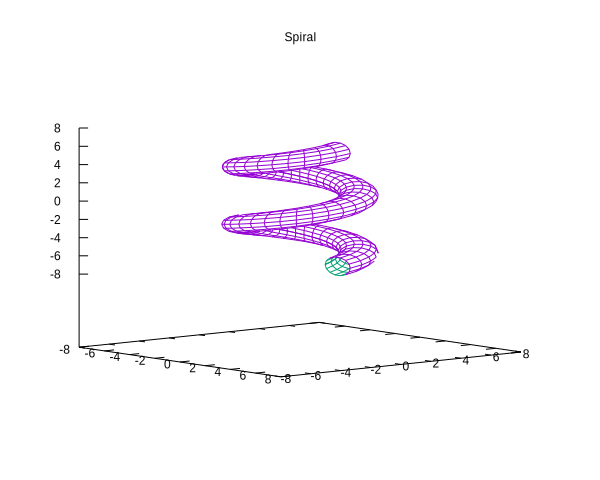

In [12]:
Gnuplot::SPlot.new do |plot|
    plot.title 'Spiral'
    plot.nokey
    plot.parametric
    plot.hidden3d
    plot.view '80,50'
    plot.isosamples '60,15'
    plot.xrange '[-8:8]'
    plot.yrange '[-8:8]'
    plot.zrange '[-8:8]'
    plot.urange '[-2*pi:2*pi]'
    plot.vrange '[-pi:pi]'
    plot.data << Gnuplot::DataSet.new('cos(u)*(cos(v)+3), sin(u)*(cos(v)+3), sin(v)+u') do |ds|
        ds.with = 'lines'
    end
end

### Rubyvis

`Rubyvis` objects are automatically displayed inline as SVG.

In [1]:
require 'rubyvis'
    
Rubyvis::Panel.new do 
  width 150
  height 150
  bar do
    data [1, 1.2, 1.7, 1.5, 0.7, 0.3]
    width 20
    height {|d| d * 80}
    bottom(0)
    left {index * 25}
  end
end

LoadError: cannot load such file -- rubyvis

### Matrix & GSL

`Matrix` and `GSL::Matrix` objects are automatically displayed as $\LaTeX$.

In [2]:
require 'matrix'
Matrix[[1,2,3],[1,2,3]]

Matrix[[1, 2, 3], [1, 2, 3]]

### Nyaplot

In [3]:
require 'nyaplot'

x = []; y = []; theta = 0.6; a=1
while theta < 14*Math::PI do
  x.push(a*Math::cos(theta)/theta)
  y.push(a*Math::sin(theta)/theta)
  theta += 0.1
end
plot1 = Nyaplot::Plot.new
plot1.add(:line, x, y)
plot1.show

LoadError: cannot load such file -- nyaplot